In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df= pd.read_csv("raw_data/ride_data.csv")

In [3]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# number of cities. length = 120
city_df['city'].value_counts()

South Marychester       1
East Kaylahaven         1
Williamsonville         1
West Hannah             1
Port Shane              1
West Christopherberg    1
Rogerston               1
South Karenland         1
New Paulville           1
South Jack              1
Williamsview            1
West Samuelburgh        1
Nicolechester           1
Sotoville               1
North Richardhaven      1
South Brenda            1
North Barbara           1
South Latoya            1
Robertport              1
New Jacobville          1
Newtonview              1
Pattyland               1
Martinezhaven           1
Jerryton                1
South Phillip           1
South Teresa            1
North Jason             1
East Kentstad           1
Josephside              1
West Heather            1
                       ..
Johnton                 1
Amandaburgh             1
Lake Scott              1
Karenberg               1
Royland                 1
Lake Omar               1
Veronicaberg            1
North Holly 

In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# average fare for each city
city_avg_fare = ride_df.groupby('city').fare.mean()

In [7]:
# number of rides per city
city_ride_count = ride_df['city'].value_counts()

In [8]:
# number of drivers per city
city_driver_count = city_df['driver_count']

In [9]:
joined_df = pd.merge(ride_df, city_df, how='left', on=['city'])
joined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#assigning each city type to a color
#then using a dict lookup on the value in the dataframe to assign the city type a color?
city_colors = {'Urban':'lightcoral','Suburban':'gold','Rural':'lightskyblue'}
#create new column in city_df using city types to assign colors:
city_df['color'] = city_df['type'].apply(lambda x: city_colors[x])

In [11]:
#group by colors and create a scatter plot in order to get legend for three different types
city_type_group = city_df.groupby('type')


Text(0.5,1,'Pyber Ride Sharing Data')

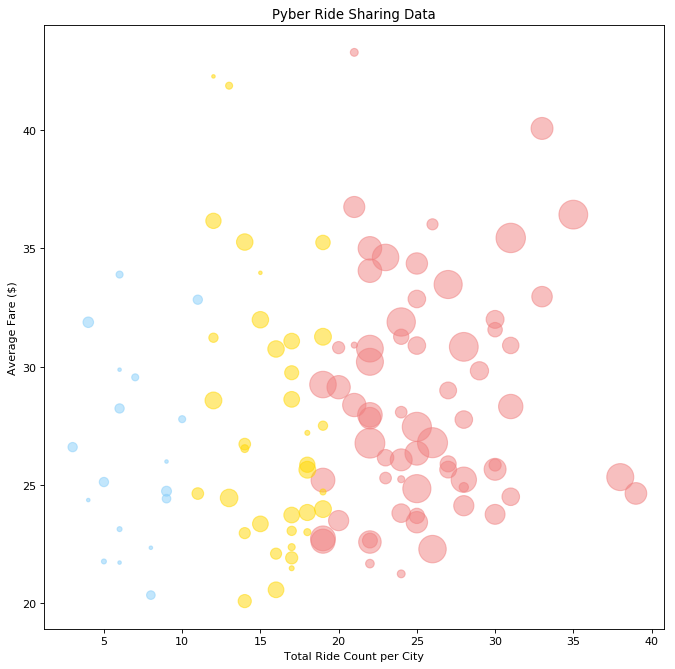

In [12]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(city_ride_count, city_avg_fare, s=city_driver_count*10, color=city_df['color'], alpha=0.5, linewidths=1)
plt.xlabel('Total Ride Count per City')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data')

#need a legend for color type
#plt.legend(loc = "upper right")

Text(0.5,1,'Percent of Total Fares by City Type')

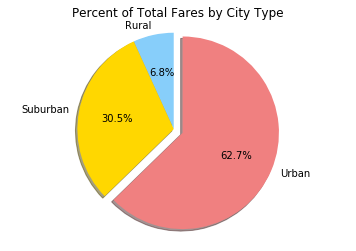

In [13]:
#% of Total Fares by City Type
fare_group = joined_df.groupby('type').fare.sum()
plt.pie(fare_group, 
        explode=(0, 0, 0.1), 
        colors = ('lightskyblue', 'gold', 'lightcoral'), 
        labels = ('Rural', 'Suburban', 'Urban'), 
        shadow=True, 
        startangle=90, 
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percent of Total Fares by City Type')

Text(0.5,1,'Percent of Total Rides by City Type')

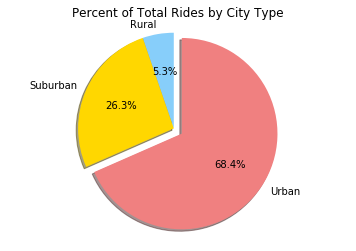

In [14]:
#% of Total Rides by City Type
ride_group = joined_df.groupby('type').ride_id.count()
plt.pie(ride_group, 
        explode=(0, 0, 0.1), 
        colors = ('lightskyblue', 'gold', 'lightcoral'), 
        labels = ('Rural', 'Suburban', 'Urban'), 
        shadow=True, 
        startangle=90, 
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percent of Total Rides by City Type')

Text(0.5,1,'Percent of Total Drivers by City Type')

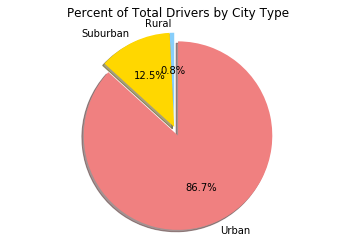

In [15]:
#% of Total Drivers by City Type
driver_group = joined_df.groupby('type').driver_count.sum()
plt.pie(driver_group, 
        explode=(0, 0, 0.1), 
        colors = ('lightskyblue', 'gold', 'lightcoral'), 
        labels = ('Rural', 'Suburban', 'Urban'), 
        shadow=True, 
        startangle=90, 
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percent of Total Drivers by City Type')

In [16]:
joined_df.groupby('type').fare.mean()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64